# Muhammad Zeeshan Akhtar

## *Exploratory Data Analysis*

### Titanic Dataset

In [72]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("train.csv")

In [34]:
df.shape

(891, 11)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### Column Types

- **Numerical** - Age,Fare,PassengerId
- **Categorical** - Survived, Pclass, Sex, SibSp, Parch,Embarked
- **Mixed** - Name, Ticket, Cabin

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Few Conclusion

- **Missing Values in Age, Cabin, Embarked Columns**
- **More then 75 percent values missing in Cabin column**
- **Few Columns have inappropriate values** 

In [8]:
# Droping the Cabin column
df.drop(columns=['Cabin'], inplace=True)

In [9]:
# Imputing missing vlaues for Age
# Strategy: Mean

df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11740\3473925690.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [10]:
# Finding the most appeared values in the columns

df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
# imputing missing values for Embarked column
df['Embarked'].fillna('S', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11740\1140224157.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)


In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Want to check one more thing
# Should I change SibSp and Parch to Categories

In [13]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [14]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

## Changing Data Types for the following Columns

In [15]:
# Survived('Category')
# Pclass('Category')
# Sex('Category')
# Age('Integer')
# Embarked('Category')

In [16]:
df['Survived']= df['Survived'].astype('category')
df['Pclass']= df['Pclass'].astype('category')
df['Sex']= df['Sex'].astype('category')
df['Age']= df['Age'].astype('int')
df['Embarked']= df['Embarked'].astype('category')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [18]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


Out of 891 : 62 percent People died in the Accident


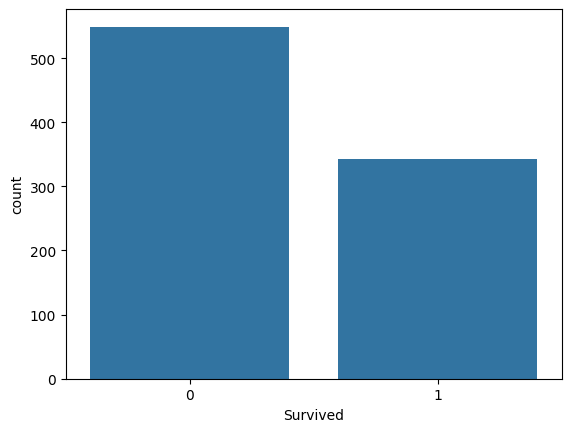

In [19]:
# Univariate Analysis
# Lets start with the Survived Column

sns.countplot(x='Survived', data=df)

death_person= round((df['Survived'].value_counts().values[0]/891)*100)
print("Out of 891 : {} percent People died in the Accident".format(death_person))

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


<Axes: xlabel='Pclass', ylabel='count'>

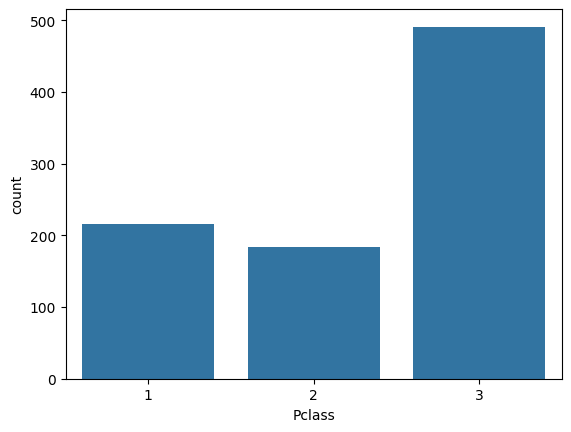

In [20]:
print((df['Pclass'].value_counts()/891)*100)

sns.countplot(x='Pclass', data=df)

# Colclusion : Pclass 1 is the most Crowded Class

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


<Axes: xlabel='Sex', ylabel='count'>

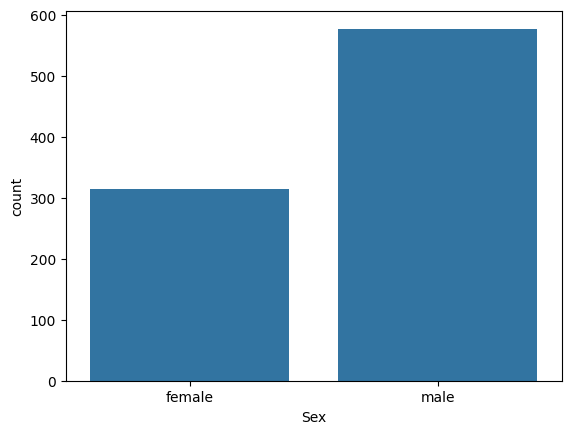

In [21]:
print((df['Sex'].value_counts()/891)*100)

sns.countplot(x='Sex', data=df)


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


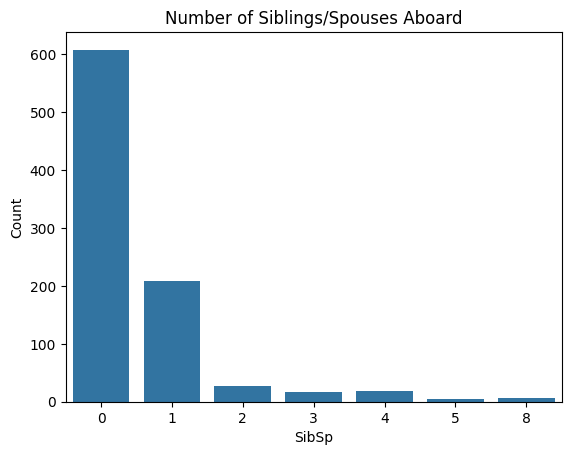

In [22]:
print(df['SibSp'].value_counts())

sns.countplot(x='SibSp', data=df)
plt.title("Number of Siblings/Spouses Aboard")
plt.xlabel("SibSp")
plt.ylabel("Count")
plt.show()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


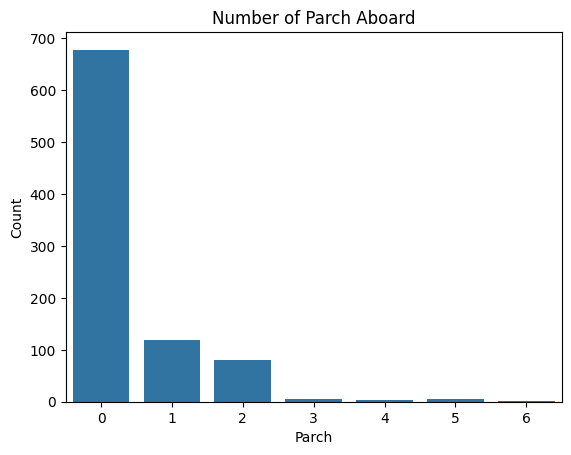

In [23]:
print(df['Parch'].value_counts())

sns.countplot(x='Parch', data=df)
plt.title("Number of Parch Aboard")
plt.xlabel("Parch")
plt.ylabel("Count")
plt.show()

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


<Axes: xlabel='Embarked', ylabel='count'>

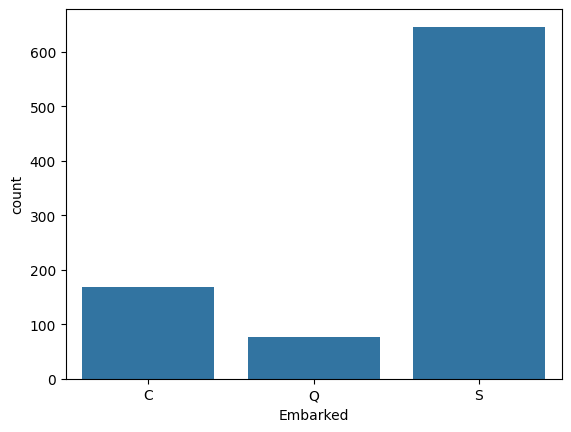

In [24]:
print((df['Embarked'].value_counts()/891)*100)

sns.countplot(x='Embarked', data=df)


C:\Users\user\AppData\Local\Temp\ipykernel_11740\1808655673.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


0.45956263424701577
0.9865867453652877


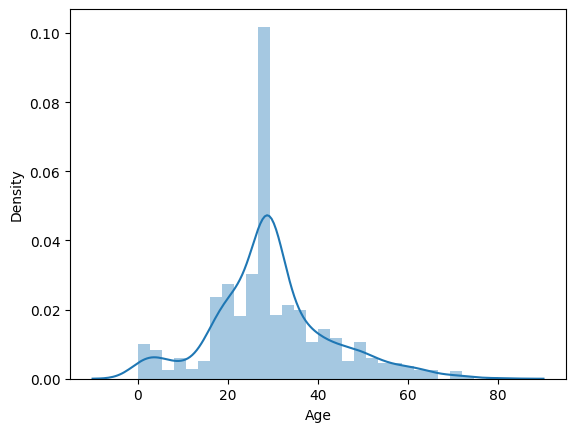

In [25]:
# Age Column

sns.distplot(df['Age'])

print(df['Age'].skew())
print(df['Age'].kurt())


<Axes: ylabel='Age'>

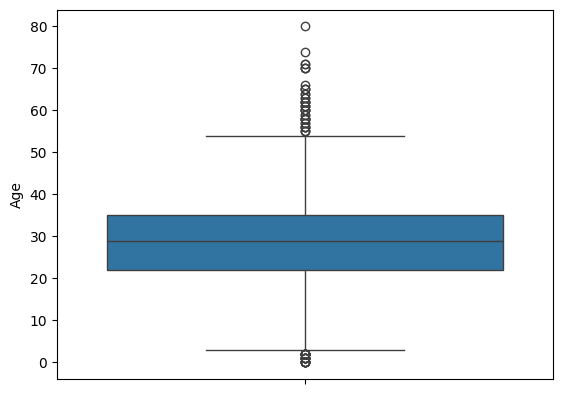

In [26]:
sns.boxplot(df['Age'])

In [27]:
print("People with age in between 60 and 70 are:", df[(df['Age'] > 60) & (df['Age'] < 70)].shape[0])
print("People with age in between 70 and 75 are:", df[(df['Age'] >=70) & (df['Age'] <= 75)].shape[0])

print("People with age greater than 75 are:", df[(df['Age'] > 75)].shape[0])

print('-' *40)

print("Child with age between 0 and 1 are:", df[(df['Age'] < 1)].shape[0])




People with age in between 60 and 70 are: 15
People with age in between 70 and 75 are: 6
People with age greater than 75 are: 1
----------------------------------------
Child with age between 0 and 1 are: 7


In [28]:
# Colclusion 

# For all practical purpose age can be considered as normal distribution
# Deeper analysis for require for outlier detection

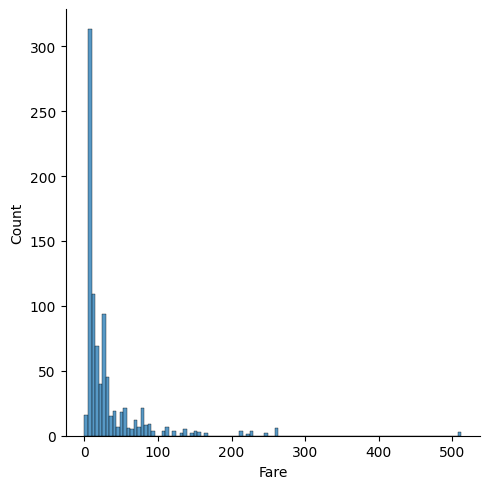

In [29]:
# Fare column

sns.displot(df['Fare'])

In [30]:
print(df['Fare'].skew())
print(df['Fare'].kurt())

4.787316519674893
33.39814088089868


<Axes: ylabel='Fare'>

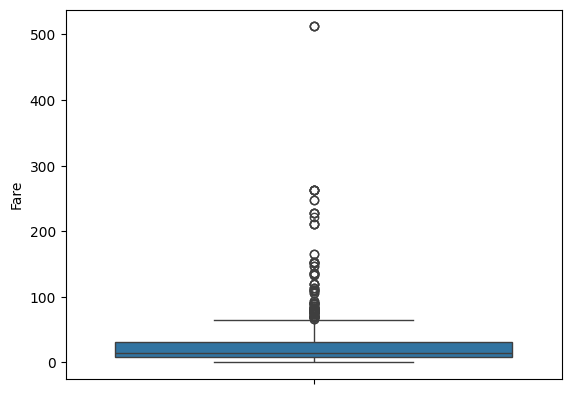

In [31]:
sns.boxplot(df['Fare'])

In [32]:
print("People with Fare in between $200 and $300:", df[(df['Fare'] > 200) & (df['Fare'] < 300)].shape[0])
print("People with Fare in greater then $300:", df[(df['Fare'] > 300)].shape[0])


People with Fare in between $200 and $300: 17
People with Fare in greater then $300: 3


## Conclusion

In [33]:
# Highly Skewed data, a lot of people has cheaper tickets
# Outliers are ther in the data 

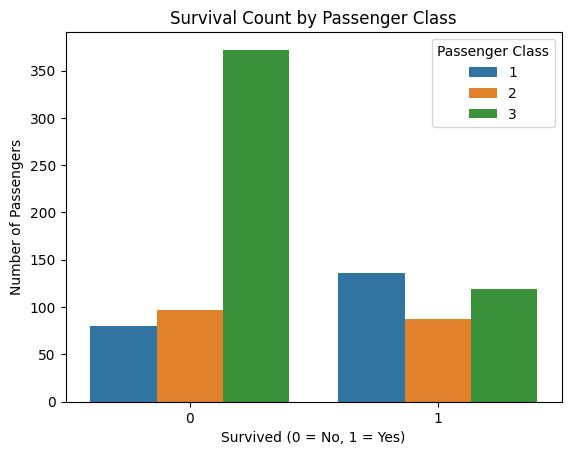

Pclass       1     2     3
Survived                  
0         14.6  17.7  67.8
1         39.8  25.4  34.8


In [43]:
# Multivariate Analysis

# Survival With Pclass

# Count plot
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.legend(title='Passenger Class')
plt.show()

# Percentage crosstab
cross_tab = pd.crosstab(df['Survived'], df['Pclass'])
percent_table = cross_tab.apply(lambda r: round((r/r.sum())*100, 1), axis=1)
print(percent_table)

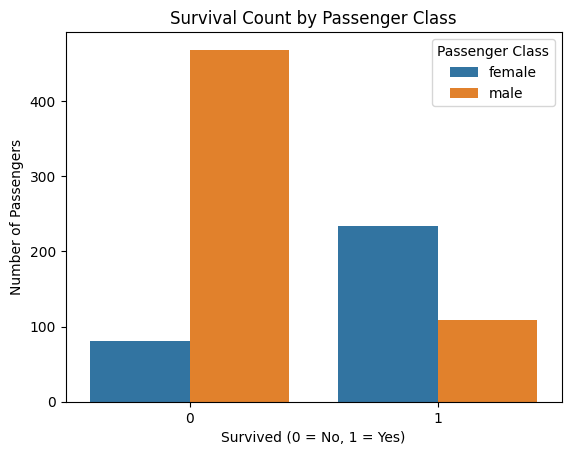

In [46]:

# Count plot
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.legend(title='Passenger Class')
plt.show()

# Percentage crosstab
cross_tab = pd.crosstab(df['Survived'], df['Sex'])

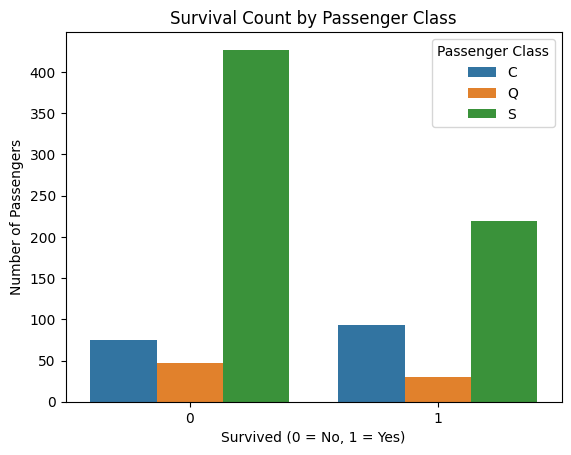

Embarked     C    Q     S
Survived                 
0         13.7  8.6  77.8
1         27.2  8.8  64.0


In [47]:


# Count plot
sns.countplot(x='Survived', hue='Embarked', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.legend(title='Passenger Class')
plt.show()

# Percentage crosstab
cross_tab = pd.crosstab(df['Survived'], df['Embarked'])
percent_table = cross_tab.apply(lambda r: round((r/r.sum())*100, 1), axis=1)
print(percent_table)

C:\Users\user\AppData\Local\Temp\ipykernel_11740\455663189.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Age'])
C:\Users\user\AppData\Local\Temp\ipykernel_11740\455663189.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Age'])


<Axes: xlabel='Age', ylabel='Density'>

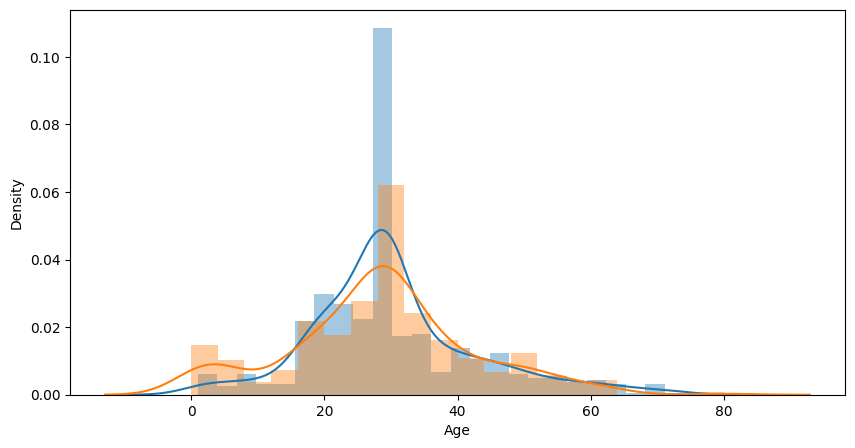

In [51]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

C:\Users\user\AppData\Local\Temp\ipykernel_11740\1996264828.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Fare'])
C:\Users\user\AppData\Local\Temp\ipykernel_11740\1996264828.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

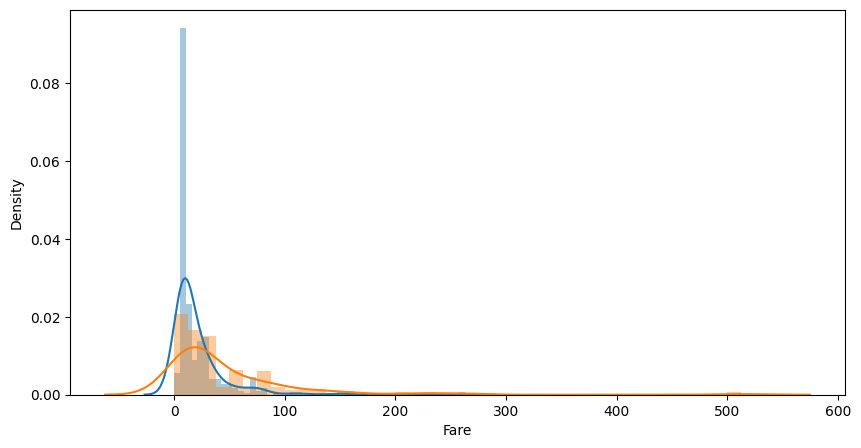

In [52]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

In [55]:
# Feature ENgineering 

df['Family_Size']= df['Parch'] + df['SibSp']

In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0


In [62]:
def family_type(number):
   if number == 0:
      return "Alone"
   elif number >= 1 and number <= 4:
      return "Medium"
   else:
      return "Large"

In [63]:
df['family_type'] = df['Family_Size'].apply(family_type)

In [65]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,family_type
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,S,0,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,S,0,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.45,S,3,Medium
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C,0,Alone
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,Q,0,Alone


In [69]:
# Drop SibSp , Parch and Famil_Size 

df.drop(columns=['SibSp','Parch','Family_Size'],inplace=True)

In [70]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7.2500,S,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,C,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,S,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35,373450,8.0500,S,Alone


In [75]:
# Counts survivors by family_type.

# Converts counts into percentages per family type.

# Shows which family types had higher survival rates.

In [73]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


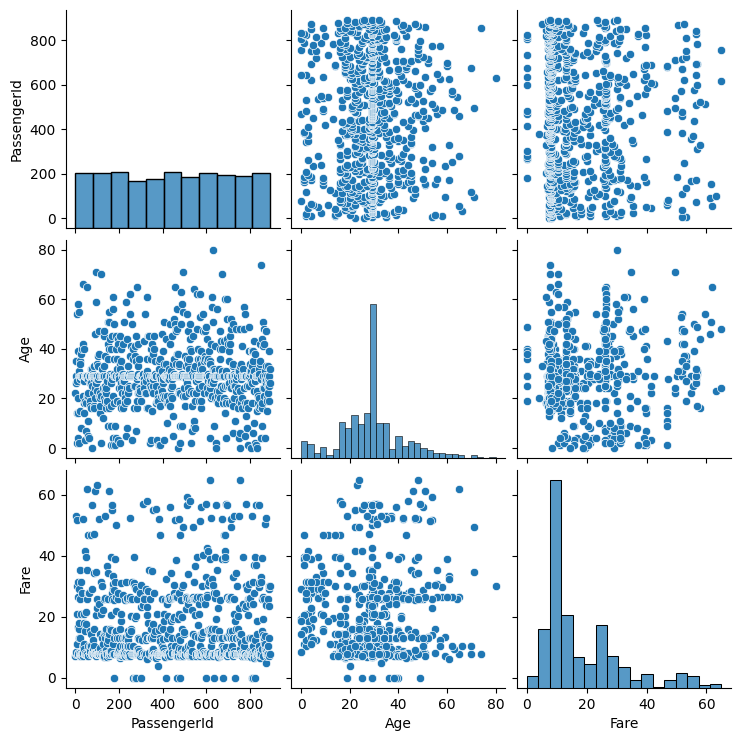

In [77]:
sns.pairplot(df)